In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

In [3]:
dataset = fetch_california_housing()

Describe Dataset

In [4]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)


In [10]:
df['Median House Value'] = dataset.target

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.shape

(20640, 9)

In [13]:
df.dtypes

MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
Median House Value    float64
dtype: object

Statistical Summary

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


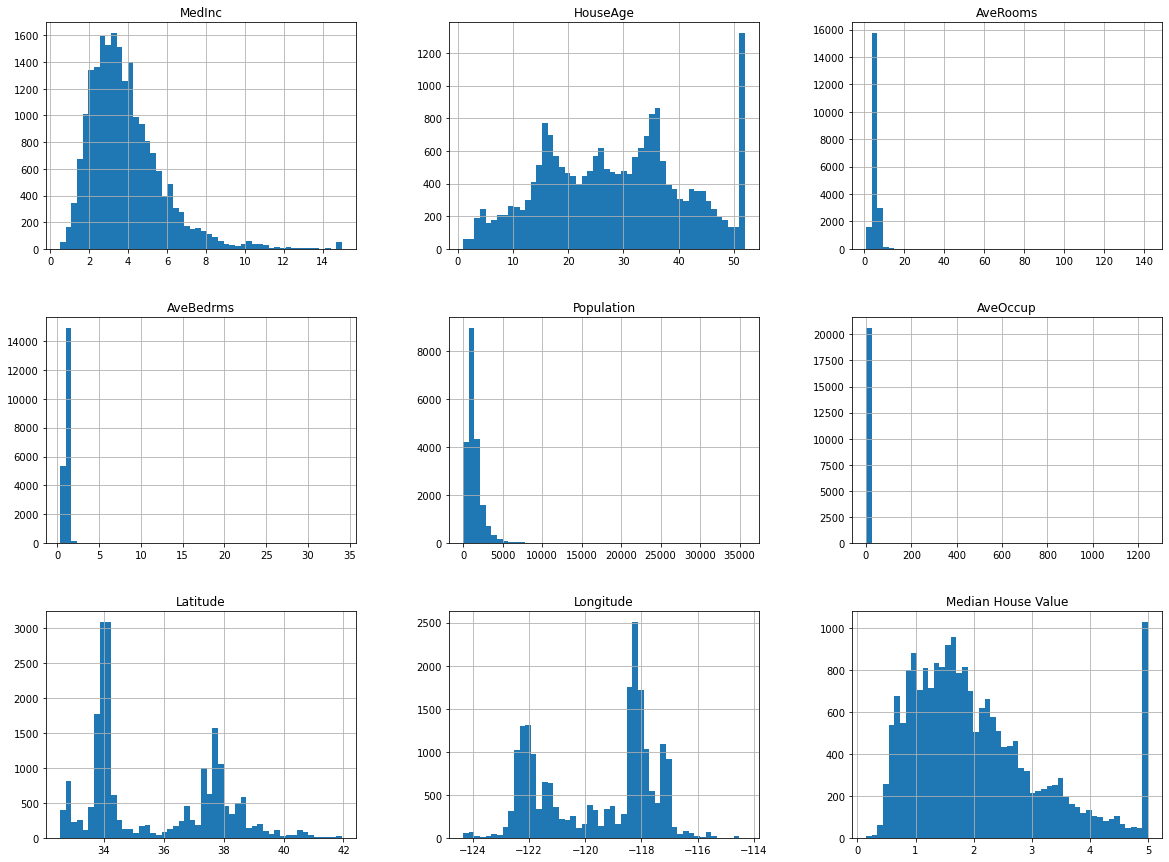

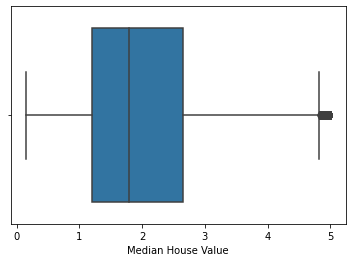

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

sns.boxplot(x=df['Median House Value'])
plt.show()

Median House Value    1.000000
MedInc                0.688075
AveRooms              0.151948
HouseAge              0.105623
AveOccup             -0.023737
Population           -0.024650
Longitude            -0.045967
AveBedrms            -0.046701
Latitude             -0.144160
Name: Median House Value, dtype: float64


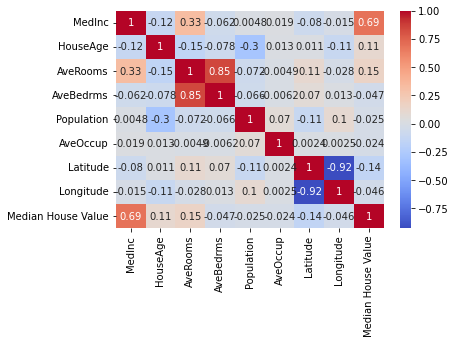

In [19]:
corr_matrix = df.corr()

print(corr_matrix["Median House Value"].sort_values(ascending=False))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [23]:
dataset['data'][...,0:1]

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   Median House Value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [26]:
df.isnull().sum()


MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
Median House Value    0
dtype: int64

Input as Numpy array

In [27]:
X = dataset['data']
y = dataset['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
w = model.coef_
b = model.intercept_
print(w, b)

[ 4.34992727e-01  9.37464310e-03 -1.01481468e-01  5.83641609e-01
 -4.57611132e-06 -3.42347916e-03 -4.15101327e-01 -4.27812987e-01] -36.32192884738328


In [31]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6068577079863416 0.5389210251121639


Input as dataset

In [32]:
X = df.drop(['Median House Value'],axis=1)
y = df['Median House Value']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [34]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6002913733391455 0.5166400620394684


In [37]:
performance_dict = {'R2 Score': r2_s, 'Mean Square Error': mse_err}
performance_df = pd.DataFrame(performance_dict,index = [0])

In [38]:
performance_df

,R2 Score,Mean Square Error
0,0.600291,0.51664
